## Методы на нейронных сетях

Подключаемые модули

In [0]:
import pandas as pd
import numpy as np
import pickle
import math

Подгрузка данных о доменных именах с диска 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
with open('/content/gdrive/My Drive/Colab Notebooks/Res/input data/training_data.pkl', 'rb') as f:
  training_data = pickle.load(f)

Общая коллекция данных

In [0]:
all_data_dict = pd.concat([training_data['legit'], training_data['dga']], ignore_index=True)

Массивы обучения

In [0]:
# Массив x хранит образцы обучения
# В массиве y хранятся целевые значения (метки типов) для образцов обучения
X = np.array(all_data_dict['domain'].tolist())
y = np.array(all_data_dict['type'].tolist())

In [6]:
X

array(['netflix', 'api-global', 'prod', ..., 'iumgkaoasgoyiccy',
       'aemosuaokkwmqqmq', 'eimgukowkqeckykg'], dtype='<U63')

In [7]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
from tensorflow.keras.preprocessing import sequence

In [0]:
# Создание словаря действительных символов
valid_chars = {x:idx+1 for idx, x in enumerate(set(''.join(X)))}

In [10]:
valid_chars

{'-': 24,
 '0': 29,
 '1': 16,
 '2': 4,
 '3': 32,
 '4': 30,
 '5': 9,
 '6': 2,
 '7': 1,
 '8': 23,
 '9': 14,
 'a': 37,
 'b': 19,
 'c': 10,
 'd': 25,
 'e': 28,
 'f': 11,
 'g': 34,
 'h': 17,
 'i': 18,
 'j': 26,
 'k': 5,
 'l': 12,
 'm': 33,
 'n': 15,
 'o': 35,
 'p': 3,
 'q': 21,
 'r': 31,
 's': 8,
 't': 13,
 'u': 36,
 'v': 6,
 'w': 20,
 'x': 22,
 'y': 27,
 'z': 7}

In [0]:
# 38 уникальных символов
max_features = len(valid_chars) + 1 

In [0]:
# 63 макс последовательность символов
maxlen = np.max([len(x) for x in X]) 

In [0]:
# Преобразование символов в int и pad (последовательности одиннаковой длины)
X = [[valid_chars[y] for y in x] for x in X]
X = sequence.pad_sequences(X, maxlen=maxlen)

In [14]:
X

array([[ 0,  0,  0, ..., 12, 18, 22],
       [ 0,  0,  0, ..., 19, 37, 12],
       [ 0,  0,  0, ..., 31, 35, 25],
       ...,
       [ 0,  0,  0, ..., 10, 10, 27],
       [ 0,  0,  0, ..., 21, 33, 21],
       [ 0,  0,  0, ..., 27,  5, 34]], dtype=int32)

Построение модели

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, SimpleRNN, GRU, Convolution1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
# 33% для теста
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [0]:
# Метод Endgame (LSTM)
modelEnd = Sequential()
modelEnd.add(Embedding(max_features, 128, input_length=maxlen))
modelEnd.add(LSTM(128))
modelEnd.add(Dropout(0.5))
modelEnd.add(Dense(1))
modelEnd.add(Activation('sigmoid'))
modelEnd.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
# Метод 2 (SimpleRNN)
modelSR = Sequential()
modelSR.add(Embedding(max_features, 128, input_length=maxlen))
modelSR.add(SimpleRNN(128))
modelSR.add(Dropout(0.5))
modelSR.add(Dense(1))
modelSR.add(Activation('sigmoid'))
modelSR.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
# Метод 3 (GRU)
modelGRU = Sequential()
modelGRU.add(Embedding(max_features, 128, input_length=maxlen))
modelGRU.add(GRU(128))
modelGRU.add(Dropout(0.5))
modelGRU.add(Dense(1))
modelGRU.add(Activation('sigmoid'))
modelGRU.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
# Метод 4 (CNN)
modelCNN = Sequential()
modelCNN.add(Embedding(max_features, 128, input_length=maxlen))
modelCNN.add(Convolution1D(filters=32, kernel_size=4))
modelCNN.add(GlobalMaxPooling1D())
modelCNN.add(Dense(128))
modelCNN.add(Dropout(0.5))
modelCNN.add(Activation('relu'))
modelCNN.add(Dense(1))
modelCNN.add(Activation('sigmoid'))
modelCNN.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
# Игнорирование предостережения о нехватке памяти
import warnings
warnings.filterwarnings('ignore')

Обучение + кросс-валидация

In [0]:
names = ["Endgame (LSTM)", "SimpleRNN", "GRU", "CNN"]
models = [modelEnd, modelSR, modelGRU, modelCNN]

In [23]:
for model, name in zip(models, names):
    print(name)
    model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=1024, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
    print("\n")

Endgame (LSTM)
Train on 1207116 samples, validate on 594551 samples
Epoch 1/10
1207116/1207116 [==============================] - 306s 254us/step - loss: 0.1825 - acc: 0.9279 - val_loss: 0.1201 - val_acc: 0.9551
Epoch 2/10
1207116/1207116 [==============================] - 303s 251us/step - loss: 0.1012 - acc: 0.9643 - val_loss: 0.0850 - val_acc: 0.9698
Epoch 3/10
1207116/1207116 [==============================] - 303s 251us/step - loss: 0.0823 - acc: 0.9717 - val_loss: 0.0733 - val_acc: 0.9747
Epoch 4/10
1207116/1207116 [==============================] - 303s 251us/step - loss: 0.0751 - acc: 0.9744 - val_loss: 0.0702 - val_acc: 0.9755
Epoch 5/10
1207116/1207116 [==============================] - 301s 249us/step - loss: 0.0695 - acc: 0.9761 - val_loss: 0.0635 - val_acc: 0.9782
Epoch 6/10
1207116/1207116 [==============================] - 299s 248us/step - loss: 0.0651 - acc: 0.9777 - val_loss: 0.0621 - val_acc: 0.9787
Epoch 7/10
1207116/1207116 [==============================] - 299s 2

Тестирование на отложенной выборке

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, matthews_corrcoef
from itertools import product

In [0]:
y_scoreEnd = modelEnd.predict_proba(X_test)
y_predEnd = y_scoreEnd.round()

y_scoreSR = modelSR.predict_proba(X_test)
y_predSR = y_scoreSR.round()

y_scoreGRU = modelGRU.predict_proba(X_test)
y_predGRU = y_scoreGRU.round()

y_scoreCNN = modelCNN.predict_proba(X_test)
y_predCNN = y_scoreCNN.round()

In [0]:
y_pred = [y_predEnd, y_predSR, y_predGRU, y_predCNN]
y_score = [y_scoreEnd, y_scoreSR, y_scoreGRU, y_scoreCNN]
labels = ['legit', 'dga']

In [27]:
for y_pr, y_sc, name in zip(y_pred, y_score, names):
    print(name)
    print("Accuracy score : ", accuracy_score(y_test, y_pr))
    print("Precision score : ", precision_score(y_test, y_pr))
    print("Recall score : ", recall_score(y_test, y_pr))
    print("F1 score : ", f1_score(y_test, y_pr))
    print("MCC score : ", matthews_corrcoef(y_test, y_pr))
    print("ROC AUC score : ", roc_auc_score(y_test, y_sc))
    print("Average Precision score : ", average_precision_score(y_test, y_sc))
    print("\n")


Endgame (LSTM)
Accuracy score :  0.9784021892150547
Precision score :  0.9763822768606153
Recall score :  0.9750196665758979
F1 score :  0.9757004959816218
MCC score :  0.9562644971986172
ROC AUC score :  0.9971796031497594
Average Precision score :  0.9960199115891647


SimpleRNN
Accuracy score :  0.9708805468328201
Precision score :  0.9517722042029744
Recall score :  0.9844028924994705
F1 score :  0.9678125830806443
MCC score :  0.9416867024066099
ROC AUC score :  0.9950345327311597
Average Precision score :  0.992505204066698


GRU
Accuracy score :  0.9812850369438451
Precision score :  0.9714572901736687
Recall score :  0.9869141629602736
F1 score :  0.9791247282012221
MCC score :  0.962265246599642
ROC AUC score :  0.9975686581695942
Average Precision score :  0.9965676473681415


CNN
Accuracy score :  0.95286358949863
Precision score :  0.9158846277001896
Recall score :  0.9844180206347766
F1 score :  0.94891551418973
MCC score :  0.907297645163936
ROC AUC score :  0.99034005890

Матрица ошибок (Confusion Matrix)

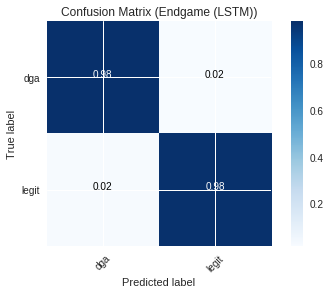

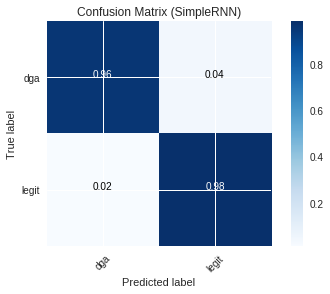

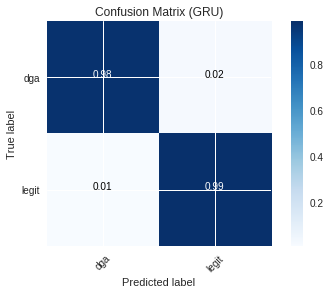

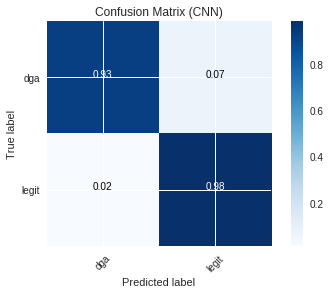

In [28]:
for y_pr, name in zip(y_pred, names):  
    cm = confusion_matrix(y_test, y_pr)
    np.set_printoptions(precision=2)

    cm = cm.astype('float') / cm.sum(axis=1).T[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (" + name + ")")
    plt.colorbar()
    plt.xticks([1, 0], labels, rotation=45)
    plt.yticks([1, 0], labels)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
      horizontalalignment="center",
      color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

ROC-кривая

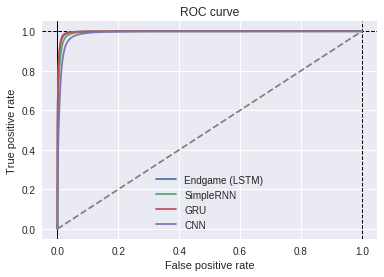

In [29]:
plt.figure()
plt.plot([0, 1], [0, 1], '--', color="grey")
plt.axvline(0, linestyle="-", c="black", lw=1)
plt.axvline(1, linestyle="--", c="black", lw=1)
plt.axhline(1, linestyle="--", c="black", lw=1)
for y_sc, name in zip(y_score, names):
    fpr, tpr, thresholds = roc_curve(y_test, y_sc)
    plt.plot(fpr, tpr, label=name)
plt.grid(True)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show() 

Кривая Точность-Полнота (Precision-Recall)

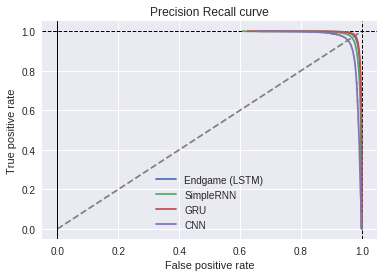

In [30]:
plt.figure()
plt.plot([0, 1], [0, 1], '--', color="grey")
plt.axvline(0, linestyle="-", c="black", lw=1)
plt.axvline(1, linestyle="--", c="black", lw=1)
plt.axhline(1, linestyle="--", c="black", lw=1)
for y_sc, name in zip(y_score, names):
    fpr, tpr, thresholds = precision_recall_curve(y_test, y_sc)
    plt.plot(fpr, tpr, label=name)
plt.grid(True)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Precision Recall curve')
plt.legend(loc='best')
plt.show()